# Load Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load Data

In [2]:
# download dataset https://www.kaggle.com/carrie1/ecommerce-data
dataset = pd.read_csv("datasets/ecommerce_data.csv",encoding= 'unicode_escape')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.00,France


# Dataset Preprocessing

In [3]:
# remove rows that have missing value
dataset = dataset.dropna()

# preprocess datatype and add some new features
dataset["Sales"] = dataset["Quantity"] * dataset["UnitPrice"]
dataset["InvoiceDate"] = pd.to_datetime(dataset["InvoiceDate"])
dataset["CustomerID"] = dataset["CustomerID"].astype("int64")
dataset["InvoiceDate_date"] = dataset["InvoiceDate"].dt.date
dataset["monthyear"] = pd.to_datetime(dataset["InvoiceDate"]).dt.to_period('M').dt.to_timestamp()
dataset = dataset[dataset.Sales>0]

# define month year period
dataset = dataset[dataset.monthyear<"2011-12"]

dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceDate_date,monthyear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444,United Kingdom,5.00,2011-11-30,2011-11-01
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444,United Kingdom,11.90,2011-11-30,2011-11-01
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444,United Kingdom,12.48,2011-11-30,2011-11-01
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444,United Kingdom,7.95,2011-11-30,2011-11-01


# Dataset Exploration

In [4]:
# see the data distribution each month
sales_monthly = dataset.groupby("monthyear").agg({"Sales":"sum","CustomerID":"nunique","InvoiceNo":"nunique"}).reset_index()
sales_monthly["Sales_per_trx"] = sales_monthly["Sales"] / sales_monthly["InvoiceNo"]
sales_monthly

,monthyear,Sales,CustomerID,InvoiceNo,Sales_per_trx
0,2010-12-01,572713.89,885,1400,409.08
1,2011-01-01,569445.04,741,987,576.95
2,2011-02-01,447137.35,758,997,448.48
3,2011-03-01,595500.76,974,1321,450.80
4,2011-04-01,469200.36,856,1149,408.36
5,2011-05-01,678594.56,1056,1555,436.40
6,2011-06-01,661213.69,991,1393,474.67
7,2011-07-01,600091.01,949,1331,450.86
8,2011-08-01,645343.90,935,1280,504.17
9,2011-09-01,952838.38,1266,1755,542.93


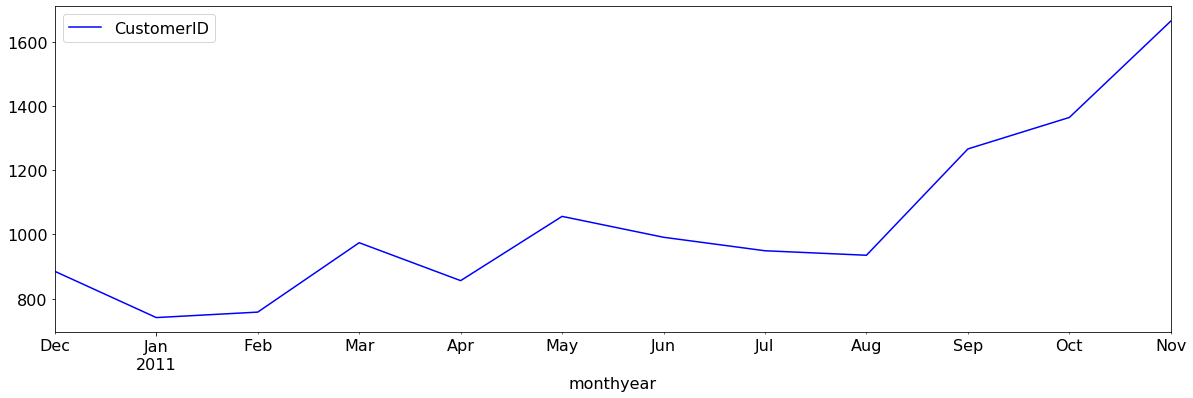

In [5]:
# plot customer
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = False
sales_monthly.plot(kind='line',x='monthyear',y='CustomerID',color='blue')
plt.show()

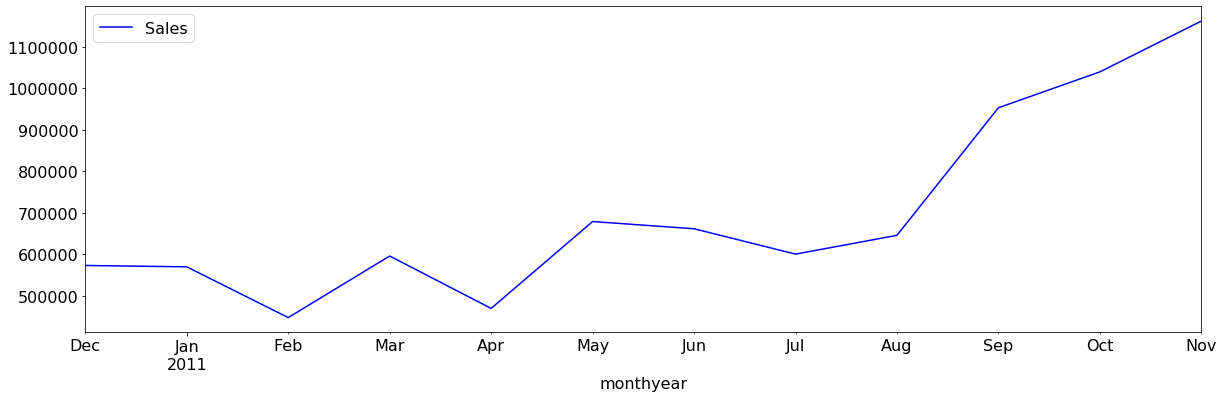

In [6]:
# plot sales
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = False
sales_monthly.plot(kind='line',x='monthyear',y='Sales',color='blue')
plt.show()

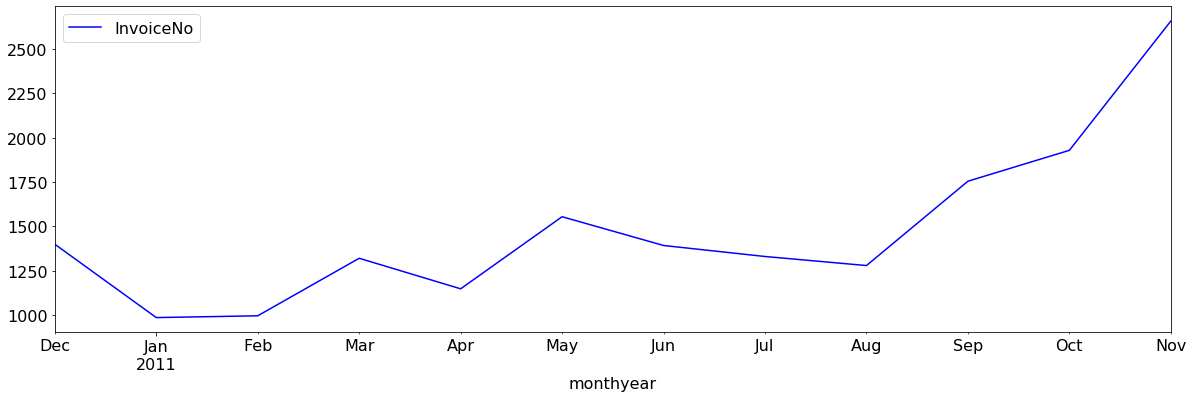

In [7]:
# plot invoice
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = False
sales_monthly.plot(kind='line',x='monthyear',y='InvoiceNo',color='blue')
plt.show()

In [8]:
# Calculate Recency (month), Frequency (unique InvoiceNo), and Monetary (Sales) by Customer ID
customer_agg = dataset.groupby("CustomerID").agg({"monthyear":"max","Sales":"sum","InvoiceNo":"nunique"}).reset_index()
customer_agg.columns = ["CustomerID","last_month","Monetary","Frequency"]

customer_agg["Recency"] =  ((pd.to_datetime("2011-12-01")  - customer_agg["last_month"])/np.timedelta64(1, 'M')).round().astype("int")
customer_agg

,CustomerID,last_month,Monetary,Frequency,Recency
0,12346,2011-01-01,77183.60,1,11
1,12347,2011-10-01,4085.18,6,2
2,12348,2011-09-01,1797.24,4,3
3,12349,2011-11-01,1757.55,1,1
4,12350,2011-02-01,334.40,1,10
...,...,...,...,...,...
4292,18280,2011-03-01,180.60,1,9
4293,18281,2011-06-01,80.82,1,6
4294,18282,2011-08-01,100.21,1,4
4295,18283,2011-11-01,1886.88,15,1


In [9]:
customer_agg.describe()

,CustomerID,Monetary,Frequency,Recency
count,4297.00,4297.00,4297.00,4297.00
mean,15302.65,1953.27,4.13,3.53
std,1720.90,8355.83,7.41,3.18
min,12346.00,2.90,1.00,1.00
25%,13816.00,304.47,1.00,1.00
50%,15300.00,657.30,2.00,2.00
75%,16781.00,1600.86,4.00,5.00
max,18287.00,268478.00,200.00,12.00


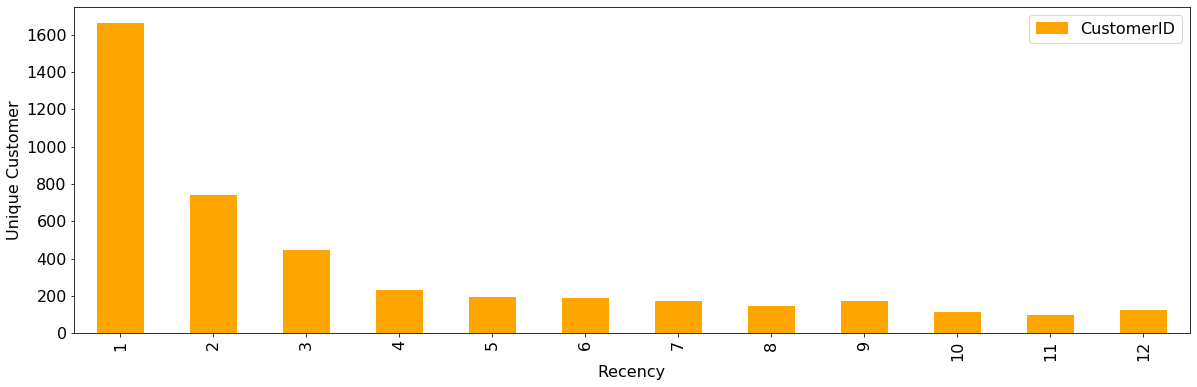

In [10]:
# Recency Distribution
recency_dist = customer_agg.groupby("Recency").agg({"CustomerID":"nunique"}).reset_index()
recency_dist.plot(kind='bar',x='Recency',y='CustomerID',color='orange',ylabel='Unique Customer')

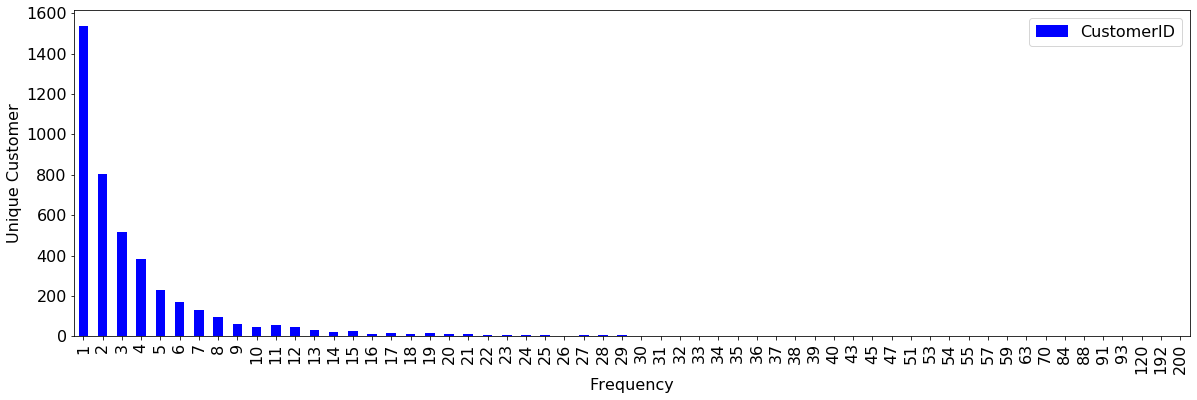

In [11]:
# Frequency Distribution
frequency_dist = customer_agg.groupby("Frequency").agg({"CustomerID":"nunique"}).reset_index()
frequency_dist.plot(kind='bar',x='Frequency',y='CustomerID',color='blue',ylabel='Unique Customer')

# Clustering using Rule-based

In [12]:
# https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python
# divide Recency, Frequency, and Monetary into 3 groups using quartile

customer_agg["Recency_rank"] = customer_agg['Recency'].rank(method='first')
customer_agg["Frequency_rank"] = customer_agg['Frequency'].rank(method='first')
customer_agg["Monetary_rank"] = customer_agg['Monetary'].rank(method='first')

customer_agg['r_quartile'] = pd.qcut(customer_agg['Recency_rank'], 3, ['1','2','3'])
customer_agg['f_quartile'] = pd.qcut(customer_agg['Frequency_rank'], 3, ['3','2','1'])
customer_agg['m_quartile'] = pd.qcut(customer_agg['Monetary_rank'], 3, ['3','2','1'])

customer_agg[["CustomerID","Recency","Frequency","Monetary","r_quartile","f_quartile","m_quartile"]]

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
0,12346,11,1,77183.60,3,3,1
1,12347,2,6,4085.18,2,1,1
2,12348,3,4,1797.24,2,2,1
3,12349,1,1,1757.55,1,3,1
4,12350,10,1,334.40,3,3,3
...,...,...,...,...,...,...,...
4292,18280,9,1,180.60,3,2,3
4293,18281,6,1,80.82,3,2,3
4294,18282,4,1,100.21,3,2,3
4295,18283,1,15,1886.88,2,1,1


In [13]:
# https://medium.com/capillary-data-science/rfm-analysis-an-effective-customer-segmentation-technique-using-python-58804480d232
# label the segment based on rule based for each Recency, Frequency, or Monetary combination

customer_agg["rfm_segment"] = None
customer_agg.loc[(customer_agg.rfm_segment.isnull())&(customer_agg.r_quartile=="1")&(customer_agg.f_quartile=="1")&(customer_agg.m_quartile=="1"),"rfm_segment"] = "1. Core"
customer_agg.loc[(customer_agg.rfm_segment.isnull())&(customer_agg.f_quartile=="1"),"rfm_segment"] = "2. Loyal"
customer_agg.loc[(customer_agg.rfm_segment.isnull())&(customer_agg.m_quartile=="1"),"rfm_segment"] = "3. Big Spender"
customer_agg.loc[(customer_agg.rfm_segment.isnull())&(customer_agg.r_quartile=="1")&(customer_agg.f_quartile=="3"),"rfm_segment"] = "4. Rookies"
customer_agg.loc[(customer_agg.rfm_segment.isnull())&(customer_agg.r_quartile=="3")&(customer_agg.f_quartile=="3"),"rfm_segment"] = "5. Slipping"
customer_agg.loc[(customer_agg.rfm_segment.isnull()),"rfm_segment"] = "6. Regular"

customer_agg[["CustomerID","Recency","Frequency","Monetary","r_quartile","f_quartile","m_quartile","rfm_segment"]]

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_segment
0,12346,11,1,77183.60,3,3,1,3. Big Spender
1,12347,2,6,4085.18,2,1,1,2. Loyal
2,12348,3,4,1797.24,2,2,1,3. Big Spender
3,12349,1,1,1757.55,1,3,1,3. Big Spender
4,12350,10,1,334.40,3,3,3,5. Slipping
...,...,...,...,...,...,...,...,...
4292,18280,9,1,180.60,3,2,3,6. Regular
4293,18281,6,1,80.82,3,2,3,6. Regular
4294,18282,4,1,100.21,3,2,3,6. Regular
4295,18283,1,15,1886.88,2,1,1,2. Loyal


In [14]:
# see segment distribution
segment_dist = customer_agg.groupby("rfm_segment").agg({"CustomerID":"nunique","Recency":["min","max","mean"],"Frequency":["min","max","mean"],"Monetary":["min","max","mean"], \
                                                       "r_quartile":["min","max"],"f_quartile":["min","max"],"m_quartile":["min","max"]}).reset_index()
segment_dist

rfm_segment CustomerID Recency          Frequency            Monetary  \
                     nunique     min max mean       min  max  mean      min   
0         1. Core        676       1   1 1.00         4  200 11.91  1158.30   
1        2. Loyal        756       1  12 2.43         4  120  6.59    36.56   
2  3. Big Spender        317       1  12 3.19         1    4  2.38  1158.29   
3      4. Rookies        216       1   1 1.00         1    1  1.00    20.80   
4     5. Slipping        770       4  12 8.22         1    1  1.00     2.90   
5      6. Regular       1562       1  12 3.26         1    3  1.91     6.20   

                    r_quartile     f_quartile     m_quartile      
        max    mean        min max        min max        min max  
0 268478.00 6667.64          1   1          1   1          1   1  
1 248171.76 2678.98          1   3          1   1          3   1  
2  77183.60 2542.93          1   3          3   2          1   1  
3   1013.01  293.35          1   1          3   3          3   2  
4   1143.60  282.31          3   3          3   3          3   2  
5   1156.36  495.35          1   3          3   2          3   2

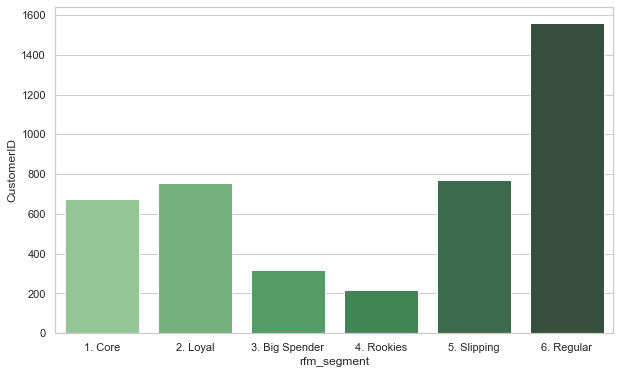

In [15]:
user_dist = customer_agg.groupby("rfm_segment").agg({"CustomerID":"nunique"}).reset_index()
plt.rcParams["figure.figsize"] = [10, 6]
sns.set_theme(style="whitegrid", font_scale=1)
sns.barplot(data=user_dist,x='rfm_segment',y='CustomerID',palette="Greens_d",orient="v")

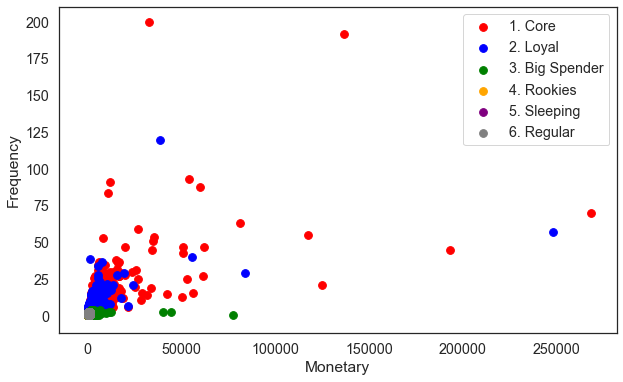

In [16]:
# 2d visualization
X = customer_agg

# Monetary x Frequency
plt.rcParams["figure.figsize"] = [10, 6]
sns.set_theme(style="white", font_scale=1.3)
plt.scatter(X[X.rfm_segment == "1. Core"].Monetary, X[X.rfm_segment == "1. Core"].Frequency, s = 60, c = 'red', label = '1. Core')
plt.scatter(X[X.rfm_segment == "2. Loyal"].Monetary, X[X.rfm_segment == "2. Loyal"].Frequency, s = 60, c = 'blue', label = '2. Loyal')
plt.scatter(X[X.rfm_segment == "3. Big Spender"].Monetary, X[X.rfm_segment == "3. Big Spender"].Frequency, s = 60, c = 'green', label = '3. Big Spender')
plt.scatter(X[X.rfm_segment == "4. Rookies"].Monetary, X[X.rfm_segment == "4. Rookies"].Frequency, s = 60, c = 'orange', label = '4. Rookies')
plt.scatter(X[X.rfm_segment == "5. Sleeping"].Monetary, X[X.rfm_segment == "5. Sleeping"].Frequency, s = 60, c = 'purple', label = '5. Sleeping')
plt.scatter(X[X.rfm_segment == "6. Regular"].Monetary, X[X.rfm_segment == "6. Regular"].Frequency, s = 60, c = 'gray', label = '6. Regular')
plt.xlabel('Monetary') 
plt.ylabel('Frequency') 
plt.legend() 
plt.show()

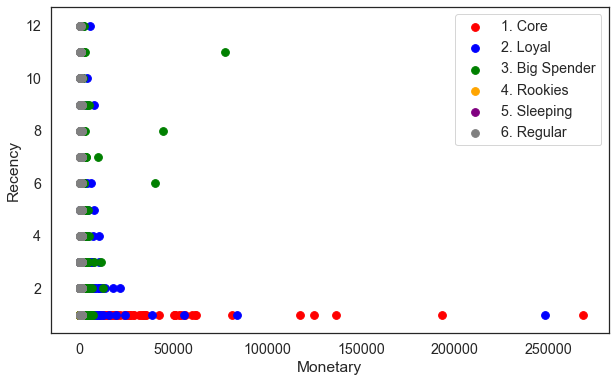

In [17]:
# Monetary x Recency
plt.scatter(X[X.rfm_segment == "1. Core"].Monetary, X[X.rfm_segment == "1. Core"].Recency, s = 60, c = 'red', label = '1. Core')
plt.scatter(X[X.rfm_segment == "2. Loyal"].Monetary, X[X.rfm_segment == "2. Loyal"].Recency, s = 60, c = 'blue', label = '2. Loyal')
plt.scatter(X[X.rfm_segment == "3. Big Spender"].Monetary, X[X.rfm_segment == "3. Big Spender"].Recency, s = 60, c = 'green', label = '3. Big Spender')
plt.scatter(X[X.rfm_segment == "4. Rookies"].Monetary, X[X.rfm_segment == "4. Rookies"].Recency, s = 60, c = 'orange', label = '4. Rookies')
plt.scatter(X[X.rfm_segment == "5. Sleeping"].Monetary, X[X.rfm_segment == "5. Sleeping"].Recency, s = 60, c = 'purple', label = '5. Sleeping')
plt.scatter(X[X.rfm_segment == "6. Regular"].Monetary, X[X.rfm_segment == "6. Regular"].Recency, s = 60, c = 'gray', label = '6. Regular')
plt.xlabel('Monetary') 
plt.ylabel('Recency') 
plt.legend() 
plt.show()

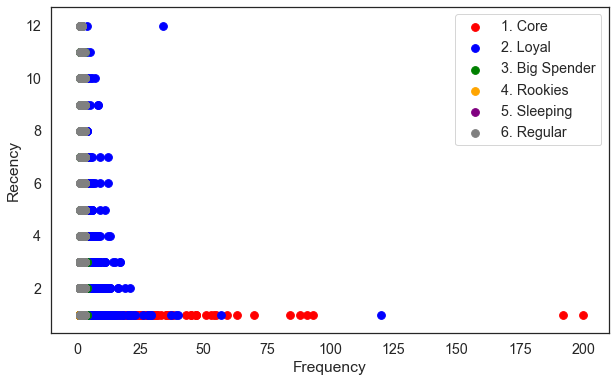

In [18]:
# Frequency x Recency
plt.scatter(X[X.rfm_segment == "1. Core"].Frequency, X[X.rfm_segment == "1. Core"].Recency, s = 60, c = 'red', label = '1. Core')
plt.scatter(X[X.rfm_segment == "2. Loyal"].Frequency, X[X.rfm_segment == "2. Loyal"].Recency, s = 60, c = 'blue', label = '2. Loyal')
plt.scatter(X[X.rfm_segment == "3. Big Spender"].Frequency, X[X.rfm_segment == "3. Big Spender"].Recency, s = 60, c = 'green', label = '3. Big Spender')
plt.scatter(X[X.rfm_segment == "4. Rookies"].Frequency, X[X.rfm_segment == "4. Rookies"].Recency, s = 60, c = 'orange', label = '4. Rookies')
plt.scatter(X[X.rfm_segment == "5. Sleeping"].Frequency, X[X.rfm_segment == "5. Sleeping"].Recency, s = 60, c = 'purple', label = '5. Sleeping')
plt.scatter(X[X.rfm_segment == "6. Regular"].Frequency, X[X.rfm_segment == "6. Regular"].Recency, s = 60, c = 'gray', label = '6. Regular')
plt.xlabel('Frequency') 
plt.ylabel('Recency') 
plt.legend() 
plt.show()

# Clustering using K-Means

In [19]:
# https://s3.amazonaws.com/assets.datacamp.com/production/course_10628/slides/chapter3.pdf
# since the data are skewed, we transform it to log 
customer_agg["Monetary_log"]= np.log(customer_agg[['Monetary']])
customer_agg["Frequency_log"]= np.log(customer_agg[['Frequency']])
customer_agg["Recency_log"]= np.log(customer_agg[['Recency']])
customer_agg

,CustomerID,last_month,Monetary,Frequency,Recency,Recency_rank,Frequency_rank,Monetary_rank,r_quartile,f_quartile,m_quartile,rfm_segment,Monetary_log,Frequency_log,Recency_log
0,12346,2011-01-01,77183.60,1,11,4077.00,1.00,4289.00,3,3,1,3. Big Spender,11.25,0.00,2.40
1,12347,2011-10-01,4085.18,6,2,1665.00,3469.00,3957.00,2,1,1,2. Loyal,8.32,1.79,0.69
2,12348,2011-09-01,1797.24,4,3,2407.00,2860.00,3349.00,2,2,1,3. Big Spender,7.49,1.39,1.10
3,12349,2011-11-01,1757.55,1,1,1.00,2.00,3320.00,1,3,1,3. Big Spender,7.47,0.00,0.00
4,12350,2011-02-01,334.40,1,10,3964.00,3.00,1240.00,3,3,3,5. Slipping,5.81,0.00,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292,18280,2011-03-01,180.60,1,9,3963.00,1536.00,570.00,3,2,3,6. Regular,5.20,0.00,2.20
4293,18281,2011-06-01,80.82,1,6,3471.00,1537.00,103.00,3,2,3,6. Regular,4.39,0.00,1.79
4294,18282,2011-08-01,100.21,1,4,3085.00,1538.00,157.00,3,2,3,6. Regular,4.61,0.00,1.39
4295,18283,2011-11-01,1886.88,15,1,1664.00,4147.00,3397.00,2,1,1,2. Loyal,7.54,2.71,0.00


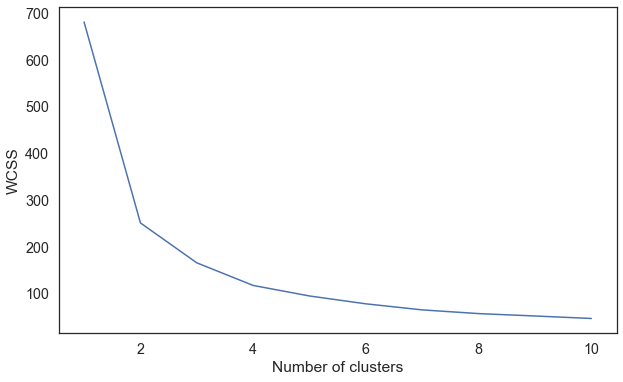

In [20]:
# Find k using elbow method
# https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/
# Inertia: It is the sum of squared distances of samples to their closest cluster center.

# K-means
dataset_array = customer_agg[["Monetary_log","Frequency_log","Recency_log"]].values
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(dataset_array)
wcss = [] 
for i in range(1, 11): 
    k_model =  KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_model.fit(X_scaled)
    wcss.append(k_model.inertia_)

plt.rcParams["figure.figsize"] = [10, 6]
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show(wcss)

In [21]:
# K-means
dataset_array = customer_agg[["Monetary_log","Frequency_log","Recency_log"]].values
scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(dataset_array)

k_model = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
k_model.fit(X_scaled)

predicted_values = k_model.predict(X_scaled)

predicted_values = pd.DataFrame(predicted_values, columns=["cluster_segment"])
dataset_cluster = pd.concat([customer_agg,predicted_values], axis=1)

In [22]:
# cluster distribution
cluster_dist = dataset_cluster.groupby("cluster_segment").agg({"CustomerID":"nunique","Frequency":["min","max","mean"],\
                                                               "Monetary":["min","max","mean"],\
                                                               "Recency":["min","max","mean"]}).reset_index()
cluster_dist

cluster_segment CustomerID Frequency            Monetary                    \
                     nunique       min  max  mean      min       max    mean   
0               0       1200         1   34  1.62     2.90  77183.60  624.47   
1               1        887         1    7  2.32    20.80   6207.67  719.61   
2               2       1331         1   17  2.56     6.20  12601.83  979.69   
3               3        879         3  200 11.77   621.68 268478.00 6486.46   

  Recency           
      min max mean  
0       4  12 8.07  
1       1   1 1.00  
2       2   5 2.71  
3       1   3 1.12

In [23]:
# Cluster Labeling
dataset_cluster.loc[dataset_cluster.cluster_segment==3,"rfm_segment"] = "1. Champion"
dataset_cluster.loc[dataset_cluster.cluster_segment==1,"rfm_segment"] = "2. Recent"
dataset_cluster.loc[dataset_cluster.cluster_segment==2,"rfm_segment"] = "3. Regular"
dataset_cluster.loc[dataset_cluster.cluster_segment==0,"rfm_segment"] = "4. Sleeping"
dataset_cluster

,CustomerID,last_month,Monetary,Frequency,Recency,Recency_rank,Frequency_rank,Monetary_rank,r_quartile,f_quartile,m_quartile,rfm_segment,Monetary_log,Frequency_log,Recency_log,cluster_segment
0,12346,2011-01-01,77183.60,1,11,4077.00,1.00,4289.00,3,3,1,4. Sleeping,11.25,0.00,2.40,0
1,12347,2011-10-01,4085.18,6,2,1665.00,3469.00,3957.00,2,1,1,1. Champion,8.32,1.79,0.69,3
2,12348,2011-09-01,1797.24,4,3,2407.00,2860.00,3349.00,2,2,1,3. Regular,7.49,1.39,1.10,2
3,12349,2011-11-01,1757.55,1,1,1.00,2.00,3320.00,1,3,1,2. Recent,7.47,0.00,0.00,1
4,12350,2011-02-01,334.40,1,10,3964.00,3.00,1240.00,3,3,3,4. Sleeping,5.81,0.00,2.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292,18280,2011-03-01,180.60,1,9,3963.00,1536.00,570.00,3,2,3,4. Sleeping,5.20,0.00,2.20,0
4293,18281,2011-06-01,80.82,1,6,3471.00,1537.00,103.00,3,2,3,4. Sleeping,4.39,0.00,1.79,0
4294,18282,2011-08-01,100.21,1,4,3085.00,1538.00,157.00,3,2,3,3. Regular,4.61,0.00,1.39,2
4295,18283,2011-11-01,1886.88,15,1,1664.00,4147.00,3397.00,2,1,1,1. Champion,7.54,2.71,0.00,3


In [24]:
# cluster distribution
cluster_dist = dataset_cluster.groupby("rfm_segment").agg({"CustomerID":"nunique",\
                                                           "Frequency":["min","max","mean"],\
                                                           "Monetary":["min","max","mean"],\
                                                           "Recency":["min","max","mean"]}).reset_index()
cluster_dist

rfm_segment CustomerID Frequency            Monetary                    \
                  nunique       min  max  mean      min       max    mean   
0  1. Champion        879         3  200 11.77   621.68 268478.00 6486.46   
1    2. Recent        887         1    7  2.32    20.80   6207.67  719.61   
2   3. Regular       1331         1   17  2.56     6.20  12601.83  979.69   
3  4. Sleeping       1200         1   34  1.62     2.90  77183.60  624.47   

  Recency           
      min max mean  
0       1   3 1.12  
1       1   1 1.00  
2       2   5 2.71  
3       4  12 8.07

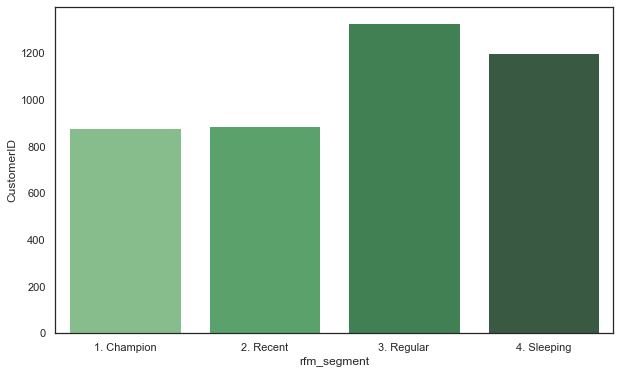

In [25]:
# plot the unique customer
user_dist = dataset_cluster.groupby("rfm_segment").agg({"CustomerID":"nunique"}).reset_index()
plt.rcParams["figure.figsize"] = [10, 6]
sns.set_theme(style="white", font_scale=1)
sns.barplot(data=user_dist,x='rfm_segment',y='CustomerID',palette="Greens_d",orient="v")

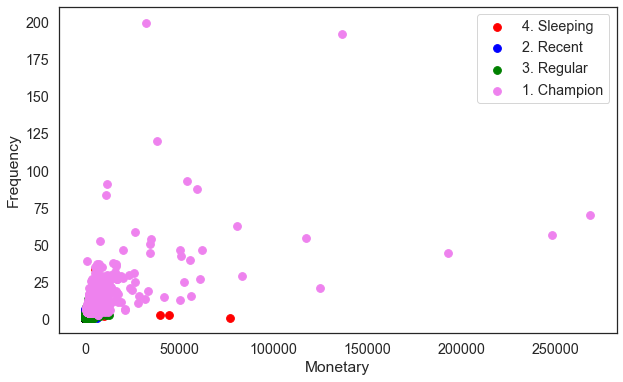

In [26]:
# 2d visualization
X = dataset_cluster

# Monetary x Frequency
plt.rcParams["figure.figsize"] = [10, 6]
sns.set_theme(style="white", font_scale=1.3)
plt.scatter(X[X.cluster_segment == 0].Monetary, X[X.cluster_segment == 0].Frequency, s = 60, c = 'red', label = '4. Sleeping')
plt.scatter(X[X.cluster_segment == 1].Monetary, X[X.cluster_segment == 1].Frequency, s = 60, c = 'blue', label = '2. Recent')
plt.scatter(X[X.cluster_segment == 2].Monetary, X[X.cluster_segment == 2].Frequency, s = 60, c = 'green', label = '3. Regular')
plt.scatter(X[X.cluster_segment == 3].Monetary, X[X.cluster_segment == 3].Frequency, s = 60, c = 'violet', label = '1. Champion')
plt.xlabel('Monetary') 
plt.ylabel('Frequency') 
plt.legend() 
plt.show()

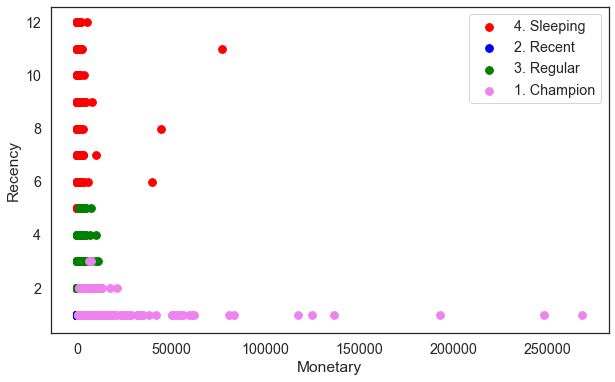

In [27]:
# Monetary x Recency
plt.scatter(X[X.cluster_segment == 0].Monetary, X[X.cluster_segment == 0].Recency, s = 60, c = 'red', label = '4. Sleeping')
plt.scatter(X[X.cluster_segment == 1].Monetary, X[X.cluster_segment == 1].Recency, s = 60, c = 'blue', label = '2. Recent')
plt.scatter(X[X.cluster_segment == 2].Monetary, X[X.cluster_segment == 2].Recency, s = 60, c = 'green', label = '3. Regular')
plt.scatter(X[X.cluster_segment == 3].Monetary, X[X.cluster_segment == 3].Recency, s = 60, c = 'violet', label = '1. Champion')
plt.xlabel('Monetary') 
plt.ylabel('Recency') 
plt.legend() 
plt.show()

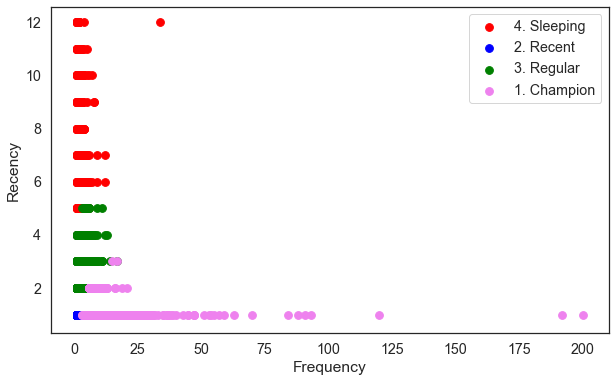

In [28]:
# Monetary x Frequency
plt.scatter(X[X.cluster_segment == 0].Frequency, X[X.cluster_segment == 0].Recency, s = 60, c = 'red', label = '4. Sleeping')
plt.scatter(X[X.cluster_segment == 1].Frequency, X[X.cluster_segment == 1].Recency, s = 60, c = 'blue', label = '2. Recent')
plt.scatter(X[X.cluster_segment == 2].Frequency, X[X.cluster_segment == 2].Recency, s = 60, c = 'green', label = '3. Regular')
plt.scatter(X[X.cluster_segment == 3].Frequency, X[X.cluster_segment == 3].Recency, s = 60, c = 'violet', label = '1. Champion')
plt.xlabel('Frequency') 
plt.ylabel('Recency') 
plt.legend() 
plt.show()

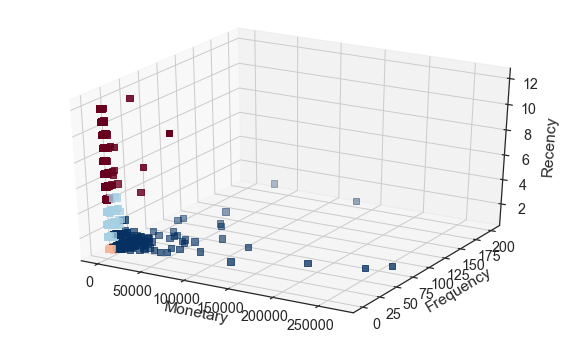

In [29]:
# 3d visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(dataset_cluster['Monetary'])
y = np.array(dataset_cluster['Frequency'])
z = np.array(dataset_cluster['Recency'])

xLabel = ax.set_xlabel('Monetary')
yLabel = ax.set_ylabel('Frequency')
zLabel = ax.set_zlabel('Recency')

ax.scatter(x,y,z, marker="s", c=dataset_cluster["cluster_segment"], s=40, cmap="RdBu")
plt.rcParams["figure.figsize"] = [20, 15]

plt.show()